In [3]:
import jupyterlab
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import scipy
import scipy.constants as const
import ipympl
import IPython
import ipywidgets
import pandas as pd
from tqdm.notebook import tqdm,trange
from scipy.stats import linregress
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
%matplotlib widget

In [4]:
fn = r"{Insert File path}"
data = pd.read_csv(fn,encoding='cp1252',header=30)

In [5]:
data

,Comment,Time Stamp (sec),Status (code),Temperature (K),Magnetic Field (Oe),Sample Position (degrees),Bridge 1 Resistivity (Ohm),Bridge 1 Excitation (uA),Bridge 2 Resistivity (Ohm-m),Bridge 2 Excitation (uA),...,Bridge 4 Excitation (uA),Bridge 1 Std. Dev. (Ohm),Bridge 2 Std. Dev. (Ohm-m),Bridge 3 Std. Dev. (Ohm),Bridge 4 Std. Dev. (Ohm-m),Number of Readings,Bridge 1 Resistance (Ohms),Bridge 2 Resistance (Ohms),Bridge 3 Resistance (Ohms),Bridge 4 Resistance (Ohms)
0,NaN,8514480.875,NaN,399.742871,0.034974,6.260825e+22,2477.886533,628.822144,NaN,NaN,...,NaN,0.908297,NaN,0.472549,NaN,25,2477.886533,NaN,566.419553,NaN
1,NaN,8514545.422,NaN,398.107920,-0.040803,6.260825e+22,2492.224111,628.822144,NaN,NaN,...,NaN,1.050580,NaN,0.148148,NaN,25,2492.224111,NaN,563.481460,NaN
2,NaN,8514622.235,NaN,395.983876,-0.019430,6.260825e+22,2513.548691,628.822144,NaN,NaN,...,NaN,1.458314,NaN,0.140080,NaN,25,2513.548691,NaN,565.608850,NaN
3,NaN,8514681.532,NaN,394.062949,0.016515,6.260825e+22,2531.678379,628.483120,NaN,NaN,...,NaN,1.567329,NaN,0.240452,NaN,25,2531.678379,NaN,562.879866,NaN
4,NaN,8514744.125,NaN,391.779845,0.023801,6.260825e+22,2554.182090,625.733074,NaN,NaN,...,NaN,1.514784,NaN,0.298443,NaN,25,2554.182090,NaN,560.115483,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,NaN,8633786.563,NaN,392.107693,30000.068984,6.260825e+22,2550.328799,617.271912,NaN,NaN,...,NaN,1.127783,NaN,0.126788,NaN,25,2550.328799,NaN,522.726882,NaN
1956,NaN,8633842.969,NaN,393.994290,30000.070469,6.260825e+22,2531.600332,617.271912,NaN,NaN,...,NaN,1.086558,NaN,0.602783,NaN,25,2531.600332,NaN,525.171458,NaN
1957,NaN,8633905.032,NaN,396.055107,30000.051094,6.260825e+22,2512.925869,617.271912,NaN,NaN,...,NaN,1.102360,NaN,1.882931,NaN,25,2512.925869,NaN,533.147869,NaN
1958,NaN,8633961.328,NaN,397.897917,30000.081797,6.260825e+22,2494.549648,617.271912,NaN,NaN,...,NaN,1.118678,NaN,0.852288,NaN,25,2494.549648,NaN,537.536660,NaN


In [6]:
field_values = list(set(np.round(data['Magnetic Field (Oe)']/10000, decimals=1)))
# divide by 10000 to convert Oe to T

In [7]:
field_values.sort()

field_values = np.array(field_values)*10000
# multiply by 10000 to convert T to Oe
field_values

array([    0.,  5000., 10000., 20000., 30000.])

In [8]:
temp_sweeps = [data[abs(data['Magnetic Field (Oe)'] - field) < 500] for field in field_values]

# Break down of what the above line does:
# temp_sweeps = []
# for field in field_values:
#     sel = abs(data['Magnetic Field (Oe)'] - field) < 500
#     temp_sweeps.append(data[sel])

Text(0.5, 1.0, 'NTH046D - cooling')

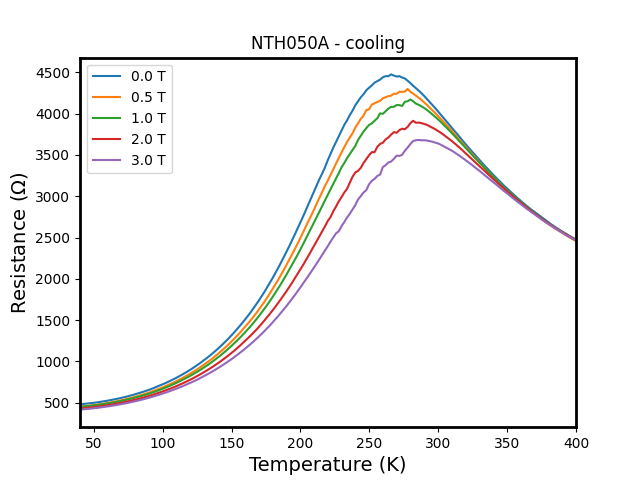

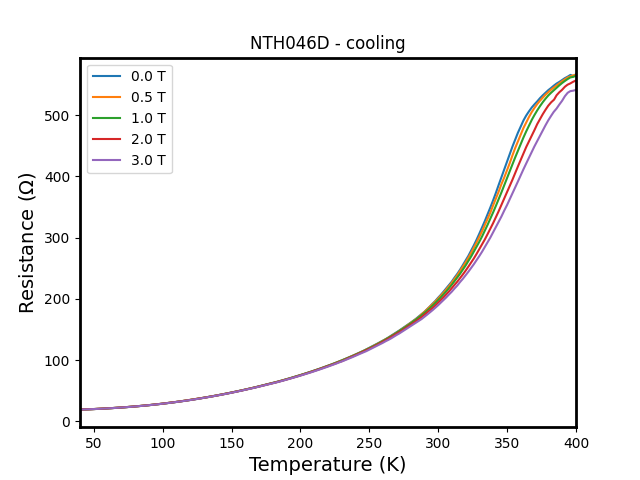

In [9]:
# Example syntax:
# d_first = temp_sweeps[0]
# ax.plot(d_first['Temperature (K)'], d_first['Bridge 1 Resistivity (Ohm)'])

temp_sweeps_cool = []
temp_sweeps_heat = []

for idx in range(len(temp_sweeps)):
    sweep_index = np.argmin(temp_sweeps[idx]['Temperature (K)']) + 1
    temp_sweeps_cool.append(temp_sweeps[idx][:sweep_index])
    temp_sweeps_heat.append(temp_sweeps[idx][sweep_index:])


fig,ax = plt.subplots()
fig1,ax1 = plt.subplots()

for idx in range(field_values.shape[0]):
    # norm = temp_sweeps[0]['Bridge 1 Resistance (Ohms)'] # can use to normalize data
    # ax.plot(temp_sweeps[idx]['Temperature (K)'],temp_sweeps[idx]['Bridge 1 Resistivity (Ohm)'],label=str(abs(field_values[idx])) + ' Oe')
    ax.plot(temp_sweeps_cool[idx]['Temperature (K)'],temp_sweeps_cool[idx]['Bridge 1 Resistance (Ohms)'],label=f"{float(field_values[idx]/10000):.1f} T")
    ax1.plot(temp_sweeps_cool[idx]['Temperature (K)'],temp_sweeps_cool[idx]['Bridge 3 Resistance (Ohms)'],label=f"{float(field_values[idx]/10000):.1f} T")
    
ax.legend()
ax1.legend()

ax.set_xlabel('Temperature (K)',fontsize=14)
ax.set_ylabel(r'Resistance ($\Omega$)',fontsize=14)
ax1.set_xlabel('Temperature (K)',fontsize=14)
ax1.set_ylabel(r'Resistance ($\Omega$)',fontsize=14)
ax.set_xlim(40,400)
ax1.set_xlim(40,400)
for spine in ax.spines.values():
    spine.set_linewidth(2)
for spine in ax1.spines.values():
    spine.set_linewidth(2)
ax.set_title('NTH050A - cooling')
ax1.set_title('NTH046D - cooling')

Text(0.5, 1.0, 'NTH046D - heating')

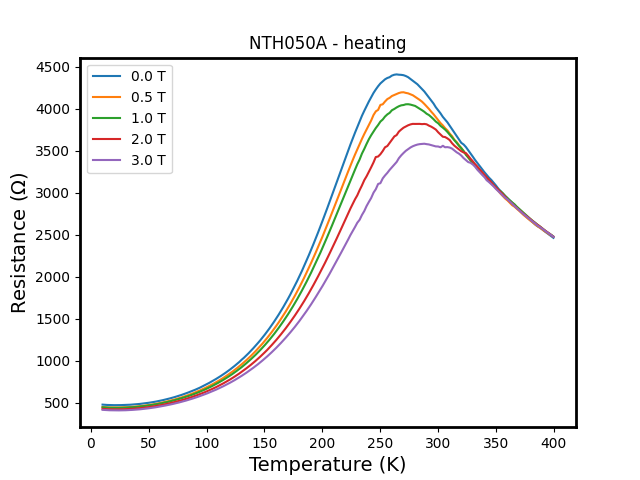

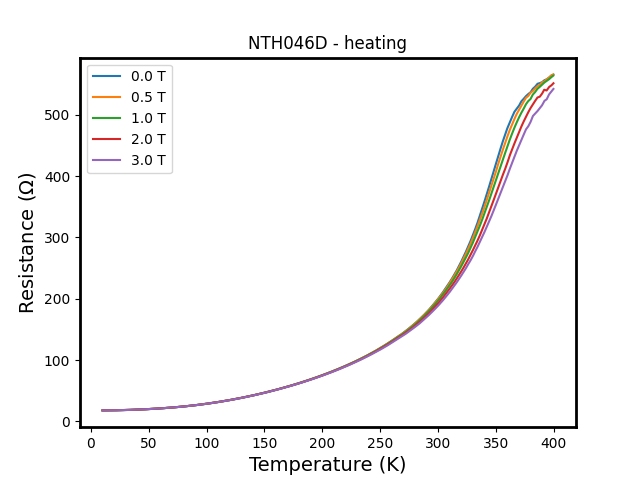

In [10]:
figh,axh = plt.subplots()
fig1h,ax1h = plt.subplots()

for idx in range(field_values.shape[0]):
    # norm = temp_sweeps[0]['Bridge 1 Resistance (Ohms)'] # can use to normalize data
    # ax.plot(temp_sweeps[idx]['Temperature (K)'],temp_sweeps[idx]['Bridge 1 Resistivity (Ohm)'],label=str(abs(field_values[idx])) + ' Oe')
    axh.plot(temp_sweeps_heat[idx]['Temperature (K)'],temp_sweeps_heat[idx]['Bridge 1 Resistance (Ohms)'],label=f"{float(field_values[idx]/10000):.1f} T")
    ax1h.plot(temp_sweeps_heat[idx]['Temperature (K)'],temp_sweeps_heat[idx]['Bridge 3 Resistance (Ohms)'],label=f"{float(field_values[idx]/10000):.1f} T")
    
axh.legend()
ax1h.legend()

axh.set_xlabel('Temperature (K)',fontsize=14)
axh.set_ylabel(r'Resistance ($\Omega$)',fontsize=14)
ax1h.set_xlabel('Temperature (K)',fontsize=14)
ax1h.set_ylabel(r'Resistance ($\Omega$)',fontsize=14)
for spine in axh.spines.values():
    spine.set_linewidth(2)
for spine in ax1h.spines.values():
    spine.set_linewidth(2)
axh.set_title('NTH050A - heating')
ax1h.set_title('NTH046D - heating')

Text(0.5, 1.0, 'NTH046D - cooling')

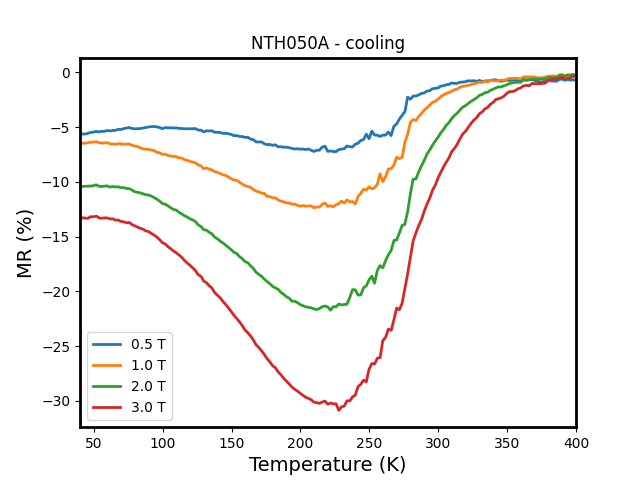

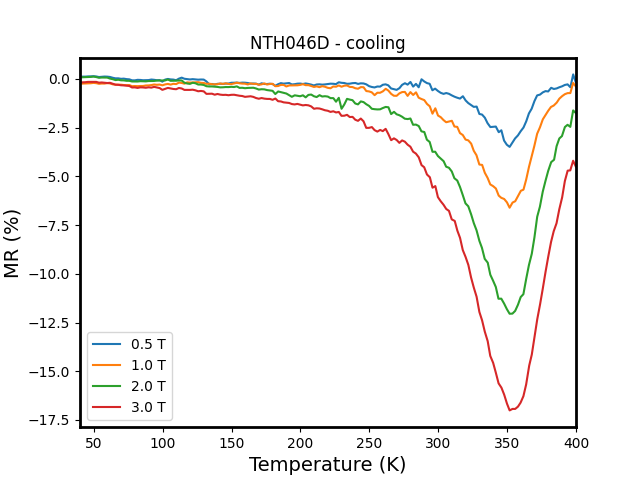

In [10]:
fig3,ax3 = plt.subplots()
fig4,ax4 = plt.subplots()

resistance_no_field1 = np.array(temp_sweeps_cool[0]['Bridge 1 Resistance (Ohms)'])
resistance_no_field2 = np.array(temp_sweeps_cool[0]['Bridge 3 Resistance (Ohms)'])

for idx in range(1, field_values.shape[0]):
    sel = np.array(temp_sweeps_cool[idx]['Temperature (K)']) >= 0
    ax3.plot(np.array(temp_sweeps_cool[idx]['Temperature (K)'])[sel], ((np.array(temp_sweeps_cool[idx]['Bridge 1 Resistance (Ohms)'])/resistance_no_field1) - 1)[sel]*100,
    label=f"{float(field_values[idx]/10000):.1f} T",linewidth=2)
    ax4.plot(np.array(temp_sweeps_cool[idx]['Temperature (K)'])[sel], ((np.array(temp_sweeps_cool[idx]['Bridge 3 Resistance (Ohms)'])/resistance_no_field2) - 1)[sel]*100,
    label=f"{float(field_values[idx]/10000):.1f} T")

ax3.legend()
ax4.legend()
ax3.set_xlabel('Temperature (K)',fontsize=14)
ax3.set_ylabel('MR (%)',fontsize=14)
ax4.set_xlabel('Temperature (K)',fontsize=14)
ax4.set_ylabel('MR (%)',fontsize=14)
ax3.set_xlim(40,400)
ax4.set_xlim(40,400)
for spine in ax3.spines.values():
    spine.set_linewidth(2)
for spine in ax4.spines.values():
    spine.set_linewidth(2)
ax3.set_title('NTH050A - cooling')
ax4.set_title('NTH046D - cooling')

Text(0.5, 1.0, 'NTH046D - heating')

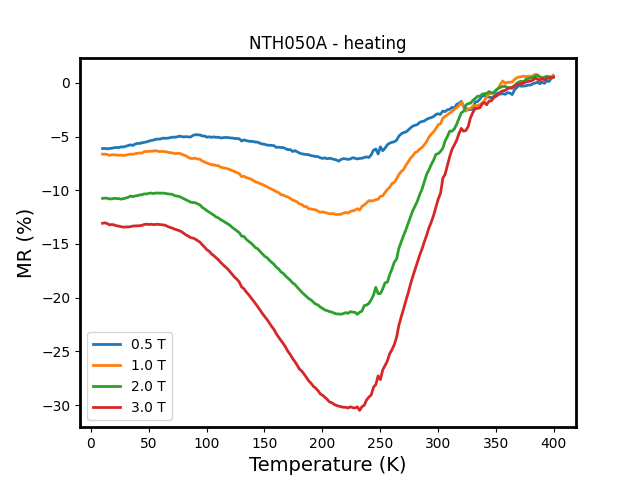

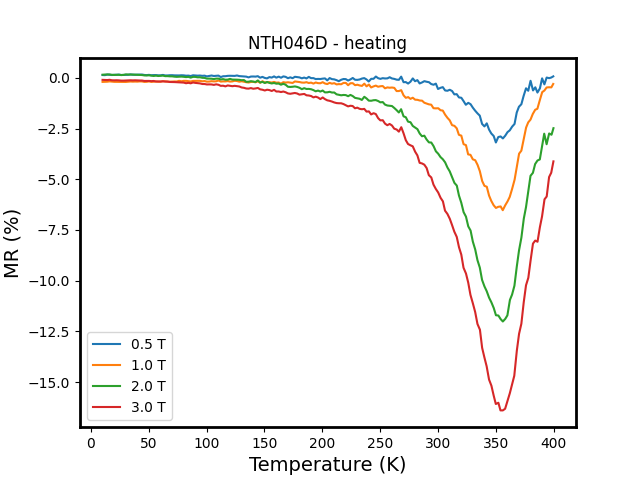

In [11]:
# Plotting of heating portion
# Calculation of % change in electrical resistance as a function of temperature at selected magnetic fields
fig3h,ax3h = plt.subplots()
fig4h,ax4h = plt.subplots()

resistance_no_field1_heat = np.array(temp_sweeps_heat[0]['Bridge 1 Resistance (Ohms)'])
resistance_no_field2_heat = np.array(temp_sweeps_heat[0]['Bridge 3 Resistance (Ohms)'])

for idx in range(1, field_values.shape[0]):
    selh = np.array(temp_sweeps_heat[idx]['Temperature (K)']) >= 0
    ax3h.plot(np.array(temp_sweeps_heat[idx]['Temperature (K)'])[selh], ((np.array(temp_sweeps_heat[idx]['Bridge 1 Resistance (Ohms)'])/resistance_no_field1_heat) - 1)[selh]*100,
    label=f"{float(field_values[idx]/10000):.1f} T",linewidth=2)
    ax4h.plot(np.array(temp_sweeps_heat[idx]['Temperature (K)'])[selh], ((np.array(temp_sweeps_heat[idx]['Bridge 3 Resistance (Ohms)'])/resistance_no_field2_heat) - 1)[selh]*100,
    label=f"{float(field_values[idx]/10000):.1f} T")

ax3h.legend()
ax4h.legend()
ax3h.set_xlabel('Temperature (K)',fontsize=14)
ax3h.set_ylabel('MR (%)',fontsize=14)
ax4h.set_xlabel('Temperature (K)',fontsize=14)
ax4h.set_ylabel('MR (%)',fontsize=14)
for spine in ax3h.spines.values():
    spine.set_linewidth(2)
for spine in ax4h.spines.values():
    spine.set_linewidth(2)
ax3h.set_title('NTH050A - heating')
ax4h.set_title('NTH046D - heating')

Fitted parameters: rho_0 = 1.9786105021796943e-05, rho_2_5 = 2.2114496025970456e-10
Sum of Squared Residuals (chi-squared): 3.0847123916145113e-09
Reduced chi-squared: 2.9660696073216456e-11
R-squared: 0.986838613376685


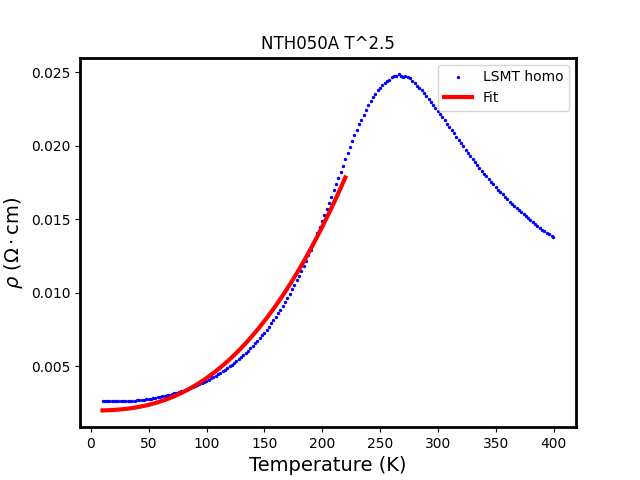

In [12]:
# Low-temp fitting

# Define the nonlinear model function (quadratic model: y = ax^2 + bx + c)
def T2_5(T, rho_0, rho_2_5):
    return rho_0 + rho_2_5 * T**2.5

# Data
x_data = np.array(temp_sweeps_cool[0]['Temperature (K)'])
y_data = np.array(temp_sweeps_cool[0]['Bridge 1 Resistance (Ohms)'])*(1*10**-3 * 111*10**-9 / (2*10**-3))
# # Conversion of resistance to Resistivty assuming Assuming a rectangular path of conduction from electrode to electrode (which are circular, 1mm in diameter, and spaced 1mm apart edge-from-edge) that would give approximately 
# R = rho (electrode spacing center-to-center) / (width of electrode cross section * film thickness) = rho (2mm/ (1mm x 1E-4 mm). (111 nm per (M*layer))

# Filter the data to include only points where T < T_threshold
T_threshold = 220  # Temperature threshold (in Kelvin)
x_data_filtered = np.array(x_data[x_data < T_threshold])
y_data_filtered = np.array(y_data[x_data < T_threshold])

# Fit the model to the data using curve_fit
params, covariance = curve_fit(T2_5, x_data_filtered, y_data_filtered)

# Extract the fitted parameters
rho_0, rho_2_5 = params
print(f"Fitted parameters: rho_0 = {rho_0}, rho_2_5 = {rho_2_5}")

# Predict y values using the fitted model
y_fit = T2_5(x_data_filtered, rho_0, rho_2_5)

# Plot the original data and the fitted curve
fig8,ax8 = plt.subplots()

ax8.scatter(x_data, y_data*100, label=r"LSMT homo", color="blue", s=2)
ax8.plot(x_data_filtered, y_fit*100, label="Fit", color="red",linewidth=3)
# ax6.plot(x_data_filtered1, y_fit1, label="Fit 2", color="green")
ax8.set_xlabel('Temperature (K)',fontsize=14)
ax8.set_ylabel(r'$\rho$ ($\Omega\cdot$cm)',fontsize=14)
ax8.set_title('NTH050A T^2.5')
for spine in ax8.spines.values():
    spine.set_linewidth(2)
ax8.legend()

# Statistics:

residuals = y_data_filtered - y_fit

# Step 2: Square the residuals
squared_residuals = residuals ** 2

# Step 3: Sum the squared residuals (sum of squares)
sum_squared_residuals = np.sum(squared_residuals)

# Output the results
# print("Residuals:", residuals)
# print("Squared Residuals:", squared_residuals)
print("Sum of Squared Residuals (chi-squared):", sum_squared_residuals)

#Print reduced chi squared
print(f"Reduced chi-squared: {sum_squared_residuals/(len(x_data_filtered)-2)}")

# Print r score
r2 = r2_score(y_data_filtered, y_fit)
print(f"R-squared: {r2}")

# fig8.savefig(r'C:\Users\bbtmr\Documents\UCONN\Jain Lab\Data analysis\Data\Figures\MRS Fall 2024 figures\LSMO-MgO rho vs T T_2.5 fit (2).png')

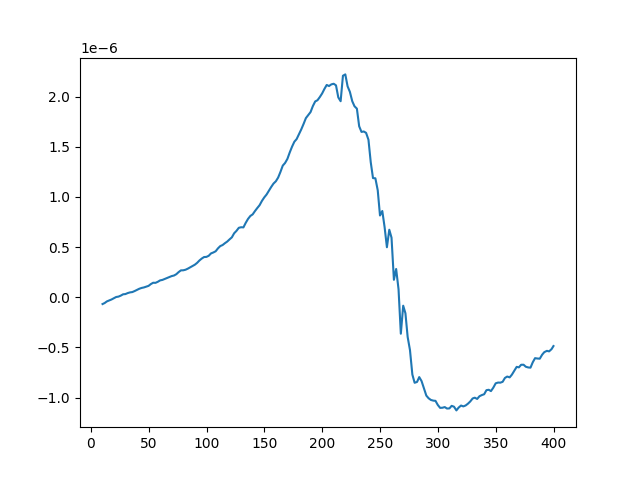

In [13]:
figtr,axtr=plt.subplots()
axtr.plot(x_data, np.gradient(y_data, x_data))

Fitted parameters: rho_0 = 1.3472132519115274e-05, rho_2 = 3.1898330337952965e-09
Sum of Squared Residuals (chi-squared): 9.36097949267847e-09
Reduced chi-squared: 9.000941819883144e-11
R-squared: 0.9600599814067006


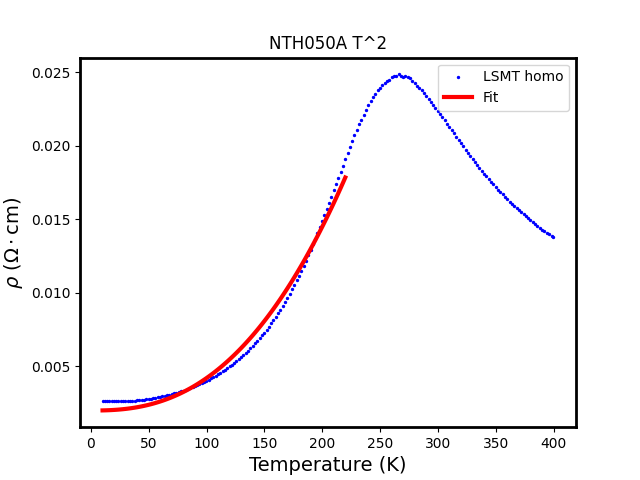

In [13]:
# Low-temp fitting T^2 model
# Curve fitting for NTH050A

# Define the nonlinear model function (quadratic model: y = ax^2 + bx + c)
def T2(T, rho_0, rho_2):
    return rho_0 + rho_2 * T**2

# Data are captured and filtered in previous cell

# Fit the model to the data using curve_fit
paramsT2, covariance = curve_fit(T2, x_data_filtered, y_data_filtered)

# Extract the fitted parameters
rho_0, rho_2 = paramsT2
print(f"Fitted parameters: rho_0 = {rho_0}, rho_2 = {rho_2}")

# Predict y values using the fitted model
y_fitT2 = T2(x_data_filtered, rho_0, rho_2)

# Plot the original data and the fitted curve
fig8T2,ax8T2 = plt.subplots()

ax8T2.scatter(x_data, y_data*100, label=r"LSMT homo", color="blue", s=2)
ax8T2.plot(x_data_filtered, y_fit*100, label="Fit", color="red",linewidth=3)
# ax6.plot(x_data_filtered1, y_fit1, label="Fit 2", color="green")
ax8T2.set_xlabel('Temperature (K)',fontsize=14)
ax8T2.set_ylabel(r'$\rho$ ($\Omega\cdot$cm)',fontsize=14)
ax8T2.set_title('NTH050A T^2')
for spine in ax8T2.spines.values():
    spine.set_linewidth(2)
ax8T2.legend()

# Statistics:

residualsT2 = y_data_filtered - y_fitT2

# Step 2: Square the residuals
squared_residualsT2 = residualsT2 ** 2

# Step 3: Sum the squared residuals (sum of squares)
sum_squared_residualsT2 = np.sum(squared_residualsT2)

# Output the results
# print("Residuals:", residuals)
# print("Squared Residuals:", squared_residuals)
print("Sum of Squared Residuals (chi-squared):", sum_squared_residualsT2)

#Print reduced chi squared
print(f"Reduced chi-squared: {sum_squared_residualsT2/(len(x_data_filtered)-2)}")

# Print r score
r2T2 = r2_score(y_data_filtered, y_fitT2)
print(f"R-squared: {r2T2}")

# fig8.savefig(r'C:\Users\bbtmr\Documents\UCONN\Jain Lab\Data analysis\Data\Figures\MRS Fall 2024 figures\LSMO-MgO rho vs T T_2.5 fit (2).png')

C:\Users\bbtmr\AppData\Local\Temp\ipykernel_11152\3706565462.py:10: RuntimeWarning: invalid value encountered in log
  return (E_a/k_B)*x + np.log(rho_0ex)


Fitted parameters: rho_0ex = 3.608279197600975e-08, E_a = 1.2558200785056891e-20
Sum of Squared Residuals: 0.013665946688123525


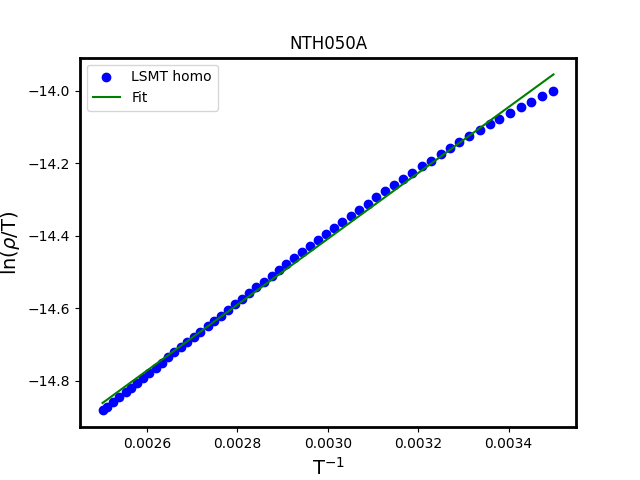

In [13]:
# High temp fitting for NTH050A
# Boltzmann constant in Joules per Kelvin
k_B = const.k

# Curve fitting
n = 1

# Define the linear model function (small polaron hopping model)
def Texp(x, rho_0ex, E_a):
    return (E_a/k_B)*x + np.log(rho_0ex)
    # x = 1/T

# Data
x_data1 = np.array(temp_sweeps_cool[0]['Temperature (K)'])
y_data1 = np.array(temp_sweeps_cool[0]['Bridge 1 Resistance (Ohms)'])*(1*10**-3 * 111*10**-9 / (2*10**-3))
# Convert Resistance to Resisitivity

# Filter the data to include only points where T > T_threshold1
T_threshold1 = 285  # Temperature threshold (in Kelvin)
x_data_filtered1 = x_data1[x_data1 > T_threshold1]
y_data_filtered1 = y_data1[x_data1 > T_threshold1]

# Linearize filtered data
x_data_fil1_lin = 1/x_data_filtered1
y_data_fil1_lin = np.log(y_data_filtered1/x_data_filtered1)

# Initial parameter guess (rho_0ex > 0, realistic E_a guess)
initial_guess = [2*10**-6, 1.6*10**-11]

# Fit the model to the filtered data using curve_fit
params1, covariance1 = curve_fit(Texp, x_data_fil1_lin, y_data_fil1_lin, p0=initial_guess)

# Extract the fitted parameters
rho_0ex, E_a = params1
print(f"Fitted parameters: rho_0ex = {rho_0ex}, E_a = {E_a}")

# Predict y values using the fitted model
y_fit1 = Texp(x_data_fil1_lin, rho_0ex, E_a)

# Plot the original data and the fitted curve
fig9, ax9 = plt.subplots()
ax9.scatter(1/x_data_filtered1, np.log(y_data_filtered1/x_data_filtered1), label="LSMT homo", color="blue")
ax9.plot(x_data_fil1_lin, y_fit1, label="Fit", color="green")
ax9.set_xlabel(r'T$^{-1}$',fontsize=14)
ax9.set_ylabel(r'$\ln (\rho/$T)',fontsize=14)
ax9.set_title('NTH050A')
ax9.legend()
for spine in ax9.spines.values():
    spine.set_linewidth(2)

# Calculate residuals and squared residuals
residuals1 = y_data_fil1_lin - y_fit1
squared_residuals1 = residuals1 ** 2
sum_squared_residuals1 = np.sum(squared_residuals1)

# Output the sum of squared residuals
print("Sum of Squared Residuals:", sum_squared_residuals1)





# # Calculate and print the Root Mean Squared Error
# RMSE = np.sqrt(sum_squared_residuals1 / len(y_data_filtered1))
# print("Root Mean Squared Error:", RMSE)

# # Compute parameter errors from the covariance matrix
# errors = np.sqrt(np.diag(covariance1))
# print(f"Parameter Errors: rho_0ex_error = {errors[0]}, E_a_error = {errors[1]}")

# # Optionally, plot the residuals
# fig_residuals, ax_residuals = plt.subplots()
# ax_residuals.plot(x_data_filtered1, residuals1, label="Residuals", color="red")
# ax_residuals.axhline(y=0, color='black', linestyle='--')
# ax_residuals.set_xlabel('Temperature (K)')
# ax_residuals.set_ylabel('Residuals')
# ax_residuals.legend()

Fitted parameters: rho_0 = 8.080578469583476e-07, rho_2_5 = 6.47504606624924e-12
Sum of Squared Residuals (chi-squared): 3.0847123916145113e-09
Reduced chi-squared: 2.9660696073216456e-11
R-squared: 0.9869627123159143


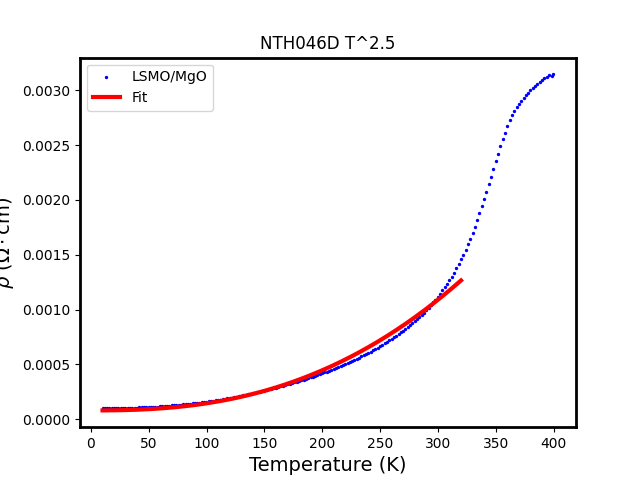

In [14]:
# Low-temp fitting

# Define the nonlinear model function (quadratic model: y = ax^2 + bx + c) (done already)

# Data
x_data2 = np.array(temp_sweeps_cool[0]['Temperature (K)'])
y_data2 = np.array(temp_sweeps_cool[0]['Bridge 3 Resistance (Ohms)'])*(1*10**-3 * 111*10**-9 / (2*10**-3))
# # Conversion of resistance to Resistivty assuming Assuming a rectangular path of conduction from electrode to electrode (which are circular, 1mm in diameter, and spaced 1mm apart edge-from-edge) that would give approximately 
# R = rho (electrode spacing center-to-center) / (width of electrode cross section * film thickness) = rho (2mm/ (1mm x 1E-4 mm). (111 nm per (M*layer))

# Filter the data to include only points where T < T_threshold
T_threshold2 = 320  # Temperature threshold (in Kelvin)
x_data_filtered2 = np.array(x_data2[x_data2 < T_threshold2])
y_data_filtered2 = np.array(y_data2[x_data2 < T_threshold2])

# Fit the model to the data using curve_fit
params2, covariance2 = curve_fit(T2_5, x_data_filtered2, y_data_filtered2)

# Extract the fitted parameters
rho_0, rho_2_5 = params2
print(f"Fitted parameters: rho_0 = {rho_0}, rho_2_5 = {rho_2_5}")

# Predict y values using the fitted model
y_fit2 = T2_5(x_data_filtered2, rho_0, rho_2_5)

# Plot the original data and the fitted curve
fig11,ax11 = plt.subplots()

ax11.scatter(x_data2, y_data2*100, label=r"LSMO/MgO", color="blue", s=2)
ax11.plot(x_data_filtered2, y_fit2*100, label="Fit", color="red",linewidth=3)
# ax6.plot(x_data_filtered1, y_fit1, label="Fit 2", color="green")
ax11.set_xlabel('Temperature (K)',fontsize=14)
ax11.set_ylabel(r'$\rho$ ($\Omega\cdot$cm)',fontsize=14)
for spine in ax11.spines.values():
    spine.set_linewidth(2)
ax11.set_title('NTH046D T^2.5')
ax11.legend()

# Statistics:

residuals2 = y_data_filtered2 - y_fit2

# Step 2: Square the residuals
squared_residuals2 = residuals2 ** 2

# Step 3: Sum the squared residuals (sum of squares)
sum_squared_residuals2 = np.sum(squared_residuals2)

# Output the results
# print("Residuals:", residuals)
# print("Squared Residuals:", squared_residuals)
print("Sum of Squared Residuals (chi-squared):", sum_squared_residuals)

#Print reduced chi squared
print(f"Reduced chi-squared: {sum_squared_residuals/(len(x_data_filtered)-2)}")

# Print r score
r2 = r2_score(y_data_filtered2, y_fit2)
print(f"R-squared: {r2}")

# fig8.savefig(r'C:\Users\bbtmr\Documents\UCONN\Jain Lab\Data analysis\Data\Figures\MRS Fall 2024 figures\LSMO-MgO rho vs T T_2.5 fit (2).png')

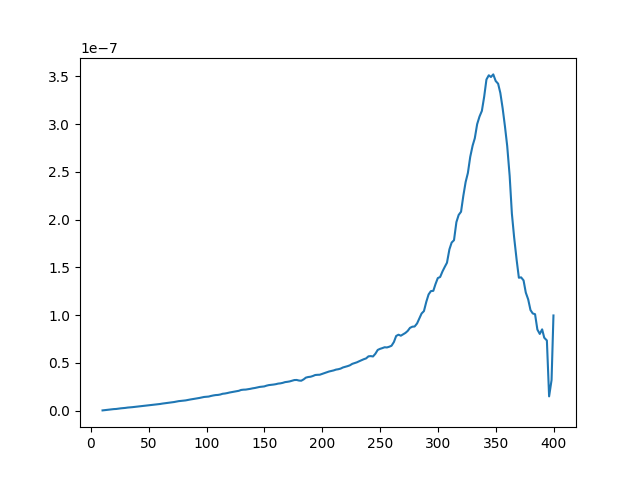

In [16]:
figtr1,axtr1=plt.subplots()
axtr1.plot(x_data2, np.gradient(y_data2, x_data2))

Fitted parameters: rho_0 = 3.4156454904428387e-07, rho_2 = 1.126356466542131e-10
Sum of Squared Residuals (chi-squared): 6.697121628580796e-11
Reduced chi-squared: 6.439540027481534e-13
R-squared: 0.9650387505946242


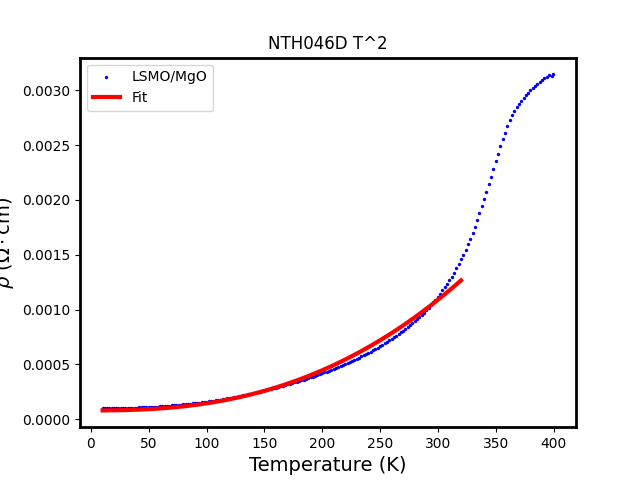

In [16]:
# Low-temp fitting T^2 model


# Define the nonlinear model function (quadratic model: y = ax^2 + bx + c) (done already)

# Data
x_data2 = np.array(temp_sweeps_cool[0]['Temperature (K)'])
y_data2 = np.array(temp_sweeps_cool[0]['Bridge 3 Resistance (Ohms)'])*(1*10**-3 * 111*10**-9 / (2*10**-3))
# # Conversion of resistance to Resistivty assuming Assuming a rectangular path of conduction from electrode to electrode (which are circular, 1mm in diameter, and spaced 1mm apart edge-from-edge) that would give approximately 
# R = rho (electrode spacing center-to-center) / (width of electrode cross section * film thickness) = rho (2mm/ (1mm x 1E-4 mm). (111 nm per (M*layer))

# Filter the data to include only points where T < T_threshold
# T_threshold2 = 340  # Temperature threshold (in Kelvin) Defined in previous cell
# x_data_filtered2 = np.array(x_data2[x_data2 < T_threshold2])
# y_data_filtered2 = np.array(y_data2[x_data2 < T_threshold2]) Defined in previous cell

# Fit the model to the data using curve_fit
params2, covariance2 = curve_fit(T2, x_data_filtered2, y_data_filtered2)

# Extract the fitted parameters
rho_0, rho_2 = params2
print(f"Fitted parameters: rho_0 = {rho_0}, rho_2 = {rho_2}")

# Predict y values using the fitted model
y_fit2T2 = T2(x_data_filtered2, rho_0, rho_2)

# Plot the original data and the fitted curve
fig11T2,ax11T2 = plt.subplots()

ax11T2.scatter(x_data2, y_data2*100, label=r"LSMO/MgO", color="blue", s=2)
ax11T2.plot(x_data_filtered2, y_fit2*100, label="Fit", color="red",linewidth=3)
# ax6.plot(x_data_filtered1, y_fit1, label="Fit 2", color="green")
ax11T2.set_xlabel('Temperature (K)',fontsize=14)
ax11T2.set_ylabel(r'$\rho$ ($\Omega\cdot$cm)',fontsize=14)
for spine in ax11T2.spines.values():
    spine.set_linewidth(2)
ax11T2.set_title('NTH046D T^2')
ax11T2.legend()

# Statistics:

residuals2 = y_data_filtered2 - y_fit2T2

# Step 2: Square the residuals
squared_residuals2 = residuals2 ** 2

# Step 3: Sum the squared residuals (sum of squares)
sum_squared_residuals2 = np.sum(squared_residuals2)

# Output the results
# print("Residuals:", residuals)
# print("Squared Residuals:", squared_residuals)
print("Sum of Squared Residuals (chi-squared):", sum_squared_residuals2)

#Print reduced chi squared
print(f"Reduced chi-squared: {sum_squared_residuals2/(len(x_data_filtered)-2)}")

# Print r score
r2 = r2_score(y_data_filtered2, y_fit2T2)
print(f"R-squared: {r2}")

# fig8.savefig(r'C:\Users\bbtmr\Documents\UCONN\Jain Lab\Data analysis\Data\Figures\MRS Fall 2024 figures\LSMO-MgO rho vs T T_2.5 fit (2).png')

C:\Users\bbtmr\AppData\Local\Temp\ipykernel_12280\448843193.py:10: RuntimeWarning: invalid value encountered in log
  return (E_a/k_B)*x + np.log(rho_0ex)


Fitted parameters: rho_0ex = 1.1596254954277021e-07, E_a = -2.0597269285449895e-21
Sum of Squared Residuals: 0.0014354217896615016


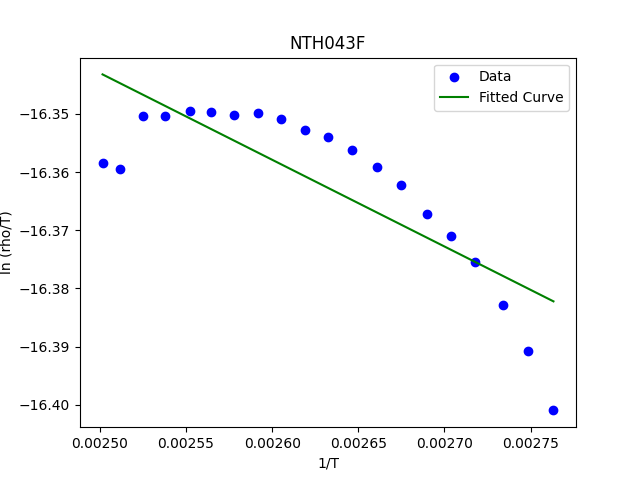

In [17]:
# Boltzmann constant in Joules per Kelvin
# High temp fit for NTH046D (cannot fit. Need more data farther from transition)
k_B = const.k

# Curve fitting
n = 1

# Define the linear model function (small polaron hopping model) (defined in previous cell)

# Data
x_data3 = np.array(temp_sweeps_cool[0]['Temperature (K)'])
y_data3 = np.array(temp_sweeps_cool[0]['Bridge 3 Resistance (Ohms)'])*(1*10**-3 * 111*10**-9 / (2*10**-3))
# Convert Resistance to Resisitivity

# Filter the data to include only points where T > T_threshold1
T_threshold3 = 360  # Temperature threshold (in Kelvin)
x_data_filtered3 = x_data3[x_data3 > T_threshold3]
y_data_filtered3 = y_data3[x_data3 > T_threshold3]

# Linearize filtered data
x_data_fil3_lin = 1/x_data_filtered3
y_data_fil3_lin = np.log(y_data_filtered3/x_data_filtered3)

# Initial parameter guess (rho_0ex > 0, realistic E_a guess)
initial_guess = [2*10**-6, 1.6*10**-11]

# Fit the model to the filtered data using curve_fit
params3, covariance3 = curve_fit(Texp, x_data_fil3_lin, y_data_fil3_lin, p0=initial_guess)

# Extract the fitted parameters
rho_0ex, E_a = params3
print(f"Fitted parameters: rho_0ex = {rho_0ex}, E_a = {E_a}")

# Predict y values using the fitted model
y_fit3 = Texp(x_data_fil3_lin, rho_0ex, E_a)

# Plot the original data and the fitted curve
fig13, ax13 = plt.subplots()
ax13.scatter(1/x_data_filtered3, np.log(y_data_filtered3/x_data_filtered3), label="Data", color="blue")
ax13.plot(x_data_fil3_lin, y_fit3, label="Fitted Curve", color="green")
ax13.set_xlabel('1/T')
ax13.set_ylabel('ln (rho/T)')
ax13.set_title('NTH043F')
ax13.legend()

# Calculate residuals and squared residuals
residuals3 = y_data_fil3_lin - y_fit3
squared_residuals3 = residuals3 ** 2
sum_squared_residuals3 = np.sum(squared_residuals3)

# Output the sum of squared residuals
print("Sum of Squared Residuals:", sum_squared_residuals3)





# # Calculate and print the Root Mean Squared Error
# RMSE = np.sqrt(sum_squared_residuals1 / len(y_data_filtered1))
# print("Root Mean Squared Error:", RMSE)

# # Compute parameter errors from the covariance matrix
# errors = np.sqrt(np.diag(covariance1))
# print(f"Parameter Errors: rho_0ex_error = {errors[0]}, E_a_error = {errors[1]}")

# # Optionally, plot the residuals
# fig_residuals, ax_residuals = plt.subplots()
# ax_residuals.plot(x_data_filtered1, residuals1, label="Residuals", color="red")
# ax_residuals.axhline(y=0, color='black', linestyle='--')
# ax_residuals.set_xlabel('Temperature (K)')
# ax_residuals.set_ylabel('Residuals')
# ax_residuals.legend()